# Assignment 1

## Loading data

In [1]:
from aa import DataLoader
import matplotlib.pyplot as plt
from aa import extract_features
from aa import check_output
import torch

In [2]:
# IN THIS BOX YOU ARE ALLOWED TO ADD ANY CODE FOR SETTING UP A PYTORCH DEVICE

In [3]:
device = torch.device('cuda:1')
dataset = DataLoader(data_dir="DDIcorpus",device=device)


In [4]:
dataset.data_df.head()

,sentence_id,token_id,char_start_id,char_end_id,split
0,DDI-DrugBank.d324.s0,9950,0,2,train
1,DDI-DrugBank.d324.s0,5580,4,8,train
2,DDI-DrugBank.d324.s0,416,10,13,train
3,DDI-DrugBank.d324.s0,12690,15,20,train
4,DDI-DrugBank.d324.s0,10093,22,25,train


In [5]:
dataset.ner_df.head()

,sentence_id,ner_id,char_start_id,char_end_id
3,DDI-DrugBank.d324.s0,3,15,20
11,DDI-DrugBank.d324.s0,3,77,82
19,DDI-DrugBank.d324.s1,3,19,26
20,DDI-DrugBank.d324.s1,5,28,34
27,DDI-DrugBank.d324.s1,3,86,93


In [6]:
dataset.vocab[:15]

['As',
 'with',
 'all',
 'drugs',
 'the',
 'potential',
 'exists',
 'for',
 'interaction',
 'with',
 'other',
 'drugs',
 'by',
 'a',
 'variety']

In [7]:
dataset.ner2id

{'N': 1, 'drug_n': 2, 'drug': 3, 'group': 4, 'brand': 5}

In [8]:
dataset.max_sample_length

102

In [9]:
dataset.get_random_sample()

/home/gusarual@GU.GU.SE/Machine-learning1/lt2316-h20-aa/aa/data_loading.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_tokens["token"] = sample_tokens.loc[:,"token_id"].apply(decode_word)


'GROUP:Antacids increase the rate of absorption of DRUG:pseudoephedrine while DRUG:kaolin decreases it'

### Data Exploration

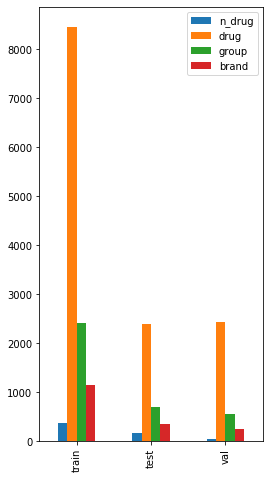

In [10]:
dataset.plot_split_ner_distribution()

### Labels

In [11]:
train_y, val_y, test_y = check_output(dataset.get_y())



## Extracting Features

In [12]:
train_X, val_X, test_X = check_output(extract_features(
                                                        data=dataset.data_df,
                                                        max_sample_length=dataset.max_sample_length, id2word = dataset.id2word
                                                        #Add any addtional arguments here
                                                       ))

## Bonus Part: Explore Some more

In [13]:
#uncomment the code below if you want to do bonus part

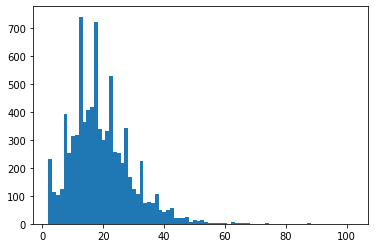

In [14]:
dataset.plot_sample_length_distribution()

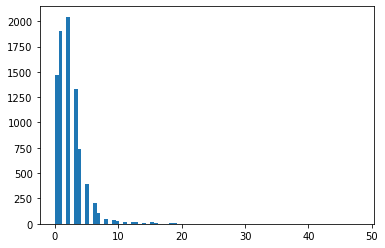

In [15]:
dataset.plot_ner_per_sample_distribution()

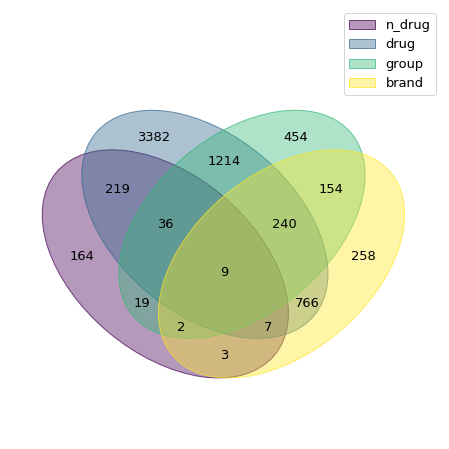

In [16]:
dataset.plot_ner_cooccurence_venndiagram()
